<a href="https://colab.research.google.com/github/dhsong95/dacon-emnist-competition/blob/master/notebooks/EMNIST_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%ls /content/gdrive/'My Drive'/'Google Colaboratory'/dacon-emnist-competition/

data/  LICENSE  notebooks/  README.md


In [ ]:
%cd /content/gdrive/'My Drive'/'Google Colaboratory'/dacon-emnist-competition/

/content/gdrive/My Drive/Google Colaboratory/dacon-emnist-competition


In [ ]:
import os
import pandas as pd

In [ ]:
datadir = 'data/'

train = pd.read_csv(os.path.join(datadir, 'train.csv'))
test = pd.read_csv(os.path.join(datadir, 'test.csv'))
submission = pd.read_csv(os.path.join(datadir, 'submission.csv'))

In [ ]:
train.sample(10)

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1460,1461,6,B,3,3,4,1,2,2,0,1,0,3,4,3,1,0,1,4,3,3,3,2,2,1,3,4,3,3,1,0,0,3,3,4,3,1,4,4,0,...,2,2,3,3,2,4,0,1,4,0,0,3,1,0,4,3,2,2,4,1,2,2,2,4,1,2,2,2,4,3,3,1,2,1,4,3,4,4,2,3
418,419,3,D,2,4,3,0,3,2,4,2,3,1,2,2,3,3,4,1,1,2,3,3,0,0,0,4,1,2,1,2,2,0,3,2,4,1,2,0,1,...,4,2,2,1,3,3,0,4,4,0,3,3,4,3,3,2,0,0,4,2,0,0,1,4,4,4,2,4,3,3,2,3,3,1,3,2,0,3,3,4
724,725,6,A,4,2,1,2,2,1,3,0,4,2,2,2,2,3,4,4,3,4,4,1,3,0,4,0,4,0,4,0,3,3,1,3,3,3,0,4,4,...,2,2,4,1,0,2,0,2,2,0,3,1,3,0,0,3,4,1,2,3,2,3,2,0,2,1,3,4,4,4,2,0,3,2,1,3,1,4,4,2
1522,1523,1,J,1,3,1,1,0,2,3,0,1,4,1,4,2,2,0,1,4,4,3,1,1,0,1,3,3,2,4,3,2,3,2,2,2,0,4,3,4,...,1,1,4,2,0,1,2,1,3,3,3,1,2,0,1,2,1,3,3,3,2,4,3,3,2,2,0,1,2,3,1,2,1,4,3,0,2,3,4,0
540,541,3,I,0,3,4,0,3,4,4,2,1,2,3,3,0,1,2,4,0,0,1,2,0,1,1,1,3,0,4,3,3,2,3,2,4,3,3,4,0,...,1,2,3,3,2,1,1,2,1,4,0,3,1,3,2,3,2,2,0,4,2,1,4,4,0,4,0,2,1,2,0,1,2,0,0,3,1,0,4,0
474,475,4,N,3,2,1,2,3,3,0,1,1,4,4,2,1,0,1,0,2,2,1,4,1,0,4,0,1,4,2,0,2,3,1,2,1,1,2,2,4,...,3,1,0,2,1,3,3,2,3,4,0,2,4,4,1,1,2,2,3,1,1,2,2,1,3,4,0,4,2,3,1,4,4,0,4,1,2,3,0,0
802,803,3,X,4,0,2,3,0,3,2,1,1,3,1,4,2,0,1,4,0,3,0,2,3,2,0,3,3,0,3,0,2,4,0,4,3,0,4,1,3,...,2,2,3,3,2,0,0,0,3,3,0,1,3,1,4,1,0,0,2,4,3,3,4,2,1,2,3,4,3,1,4,2,1,2,4,4,4,1,4,0
549,550,2,D,0,3,3,0,1,0,4,3,3,1,0,2,3,3,2,0,2,3,3,3,4,1,1,3,4,2,3,1,0,3,1,1,4,3,3,4,0,...,1,4,0,2,1,0,2,3,4,1,2,4,3,4,0,4,1,3,4,4,0,0,4,1,4,4,0,3,4,4,3,4,0,1,2,4,0,0,3,4
1069,1070,3,Y,0,4,1,0,3,4,1,4,4,2,1,2,0,0,3,2,3,0,4,3,1,3,2,2,3,4,0,4,0,3,3,1,1,1,4,0,3,...,2,3,3,0,2,1,2,1,1,3,0,2,2,3,2,4,1,0,1,2,0,1,3,3,3,4,0,2,0,0,2,0,4,2,0,4,2,4,1,2
1320,1321,1,M,0,2,0,4,2,2,1,0,4,0,4,2,0,1,4,3,2,3,0,1,2,2,1,2,2,4,2,2,4,1,4,0,1,0,0,1,0,...,3,4,1,2,1,3,0,0,3,4,3,0,3,1,3,0,3,4,1,4,4,0,4,3,3,3,0,4,0,2,4,0,4,4,4,2,2,1,0,3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
digit_columns = train.columns[3:]
digits = np.array(train.loc[:, digit_columns])
digits.shape

(2048, 784)

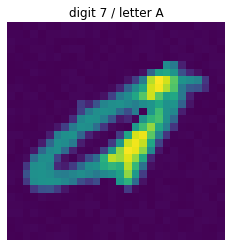

In [ ]:
index = np.random.randint(digits.shape[0])
plt.figure(figsize=(4, 4))
plt.imshow(digits[index, :].reshape(28, 28))
plt.title(f'digit {train.loc[index, "digit"]} / letter {train.loc[index, "letter"]}')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
x_train = train.drop(columns=['id', 'digit', 'letter']).values.reshape(-1, 28, 28, 1)
x_train = x_train / 255.0
x_train.shape

(2048, 28, 28, 1)

In [ ]:
N = len(train['digit'])
C = len(pd.unique(train['digit']))

y_train = np.zeros(shape=(N, C))
for idx, digit in enumerate(train['digit']):
    y_train[idx, digit] = 1
y_train.shape

(2048, 10)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D,\
    Dense, Dropout, Flatten, MaxPool2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
class BasicCNN:
    def __init__(self, image_shape):
        self.model = self.build_model(image_shape)
        adam = Adam(learning_rate=1e-3)
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer=adam,
            metrics=['accuracy']
        )

    def build_model(self, image_shape):
        model = keras.models.Sequential()

        model.add(Conv2D(128, 3, padding='same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.01))
        model.add(MaxPool2D())
        model.add(Dropout(rate=0.5))

        model.add(Conv2D(256, 3, padding='same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.01))
        model.add(MaxPool2D())
        model.add(Dropout(rate=0.5))

        model.add(Conv2D(512, 3, padding='same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(0.01))
        model.add(MaxPool2D())
        model.add(Dropout(rate=0.5))

        model.add(Flatten())

        model.add(Dense(512))
        model.add(BatchNormalization())
        model.add(Activation('relu'))

        model.add(Dense(10, activation='softmax'))


        inputs = keras.Input(image_shape[1:])
        outputs = model(inputs)

        print(model.summary())

        return keras.Model(inputs, outputs)

    def train(self, x_train, y_train, epochs):
        history = self.model.fit(
            x_train, y_train,
            epochs=epochs,
            validation_split=0.2
        )
        return history

    def predict(self, x_test):
        return self.model.predict(x_test)

In [ ]:
basic_cnn = BasicCNN(x_train.shape)
history = basic_cnn.train(x_train, y_train, 100)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization_36 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
batch_normalization_37 (Batc (None, 14, 14, 256)      

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

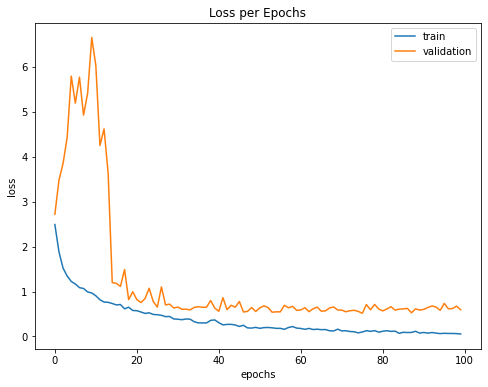

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss per Epochs')
plt.show()

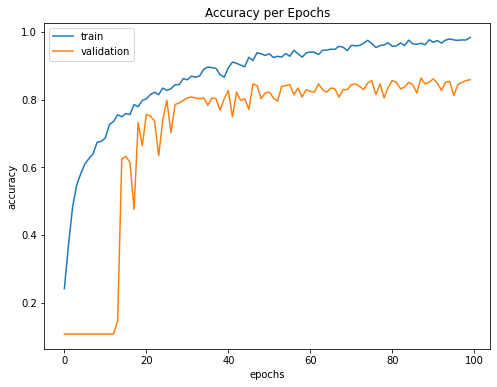

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy per Epochs')
plt.show()

In [ ]:
x_test = np.array(test.loc[:, digit_columns].values)
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test / 255.0
x_test.shape

(20480, 28, 28, 1)

In [ ]:
prediction = basic_cnn.predict(x_test)

In [ ]:
prediction = np.argmax(prediction, axis=-1)

In [ ]:
submission.head()

,id,digit
0,2049,0
1,2050,0
2,2051,0
3,2052,0
4,2053,0


In [ ]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [ ]:
submission['digit'] = prediction
submission.head(10)

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
5,2054,7
6,2055,5
7,2056,3
8,2057,4
9,2058,4


In [ ]:
# submission.to_csv('data/submission_1.csv', index=False) # 0.83
submission.to_csv('data/submissions/submission_2.csv', index=False)